In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Ensure reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


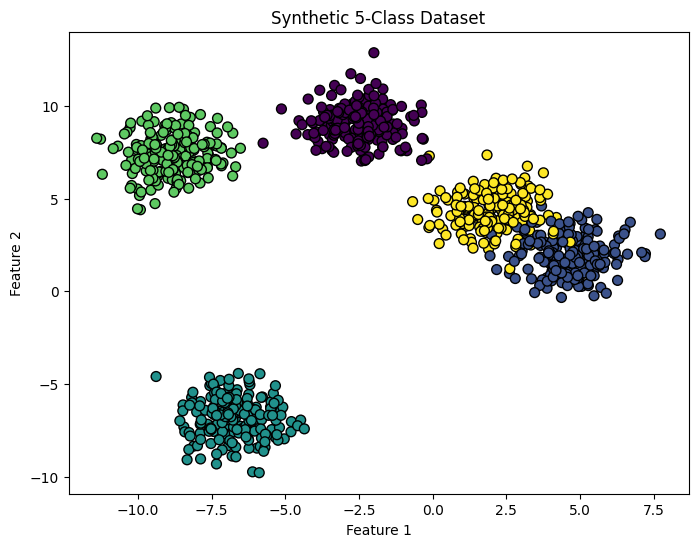

In [14]:
# Generate synthetic dataset with 5 classes
n_samples = 1000
n_classes = 5
n_features = 2

X_data, y_labels = make_blobs(
    n_samples=n_samples,
    centers=n_classes,
    n_features=n_features,
    random_state=42
)

# Function to convert labels to one-hot encoding
def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels]

y_encoded = one_hot_encode(y_labels, n_classes)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_encoded, test_size=0.2, random_state=42
)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(
    X_data[:, 0], X_data[:, 1],
    c=y_labels, cmap='viridis',
    edgecolor='k', s=50
)
plt.title("Synthetic 5-Class Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [15]:
class NeuralNetwork:
    def __init__(self, input_size, hidden1, hidden2, hidden3, output_size, learning_rate=0.01):
        self.lr = learning_rate
        
        # Initialize weights and biases (He initialization for ReLU)
        self.W1 = np.random.randn(input_size, hidden1) * np.sqrt(2 / input_size)
        self.b1 = np.zeros((1, hidden1))
        
        self.W2 = np.random.randn(hidden1, hidden2) * np.sqrt(2 / hidden1)
        self.b2 = np.zeros((1, hidden2))
        
        self.W3 = np.random.randn(hidden2, hidden3) * np.sqrt(2 / hidden2)
        self.b3 = np.zeros((1, hidden3))
        
        self.W4 = np.random.randn(hidden3, output_size) * np.sqrt(2 / hidden3)
        self.b4 = np.zeros((1, output_size))

    def relu(self, z):
        return np.maximum(0, z)

    def relu_deriv(self, z):
        return (z > 0).astype(float)

    def softmax(self, z):
        # Stability fix
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, X):
        # Layer 1
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        
        # Layer 2
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.relu(self.z2)
        
        # Layer 3
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = self.relu(self.z3)
        
        # Output Layer
        self.z4 = np.dot(self.a3, self.W4) + self.b4
        self.a4 = self.softmax(self.z4)
        return self.a4

    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        # Cross-entropy loss
        return -np.sum(y_true * np.log(y_pred + 1e-9)) / m

    def backward(self, X, y, output):
        m = X.shape[0]
        
        # Output Layer Gradient (Cross-Entropy + Softmax derivative simplifies to pred - target)
        dz4 = output - y
        dw4 = np.dot(self.a3.T, dz4) / m
        db4 = np.sum(dz4, axis=0, keepdims=True) / m
        
        # Layer 3 Gradient
        dz3 = np.dot(dz4, self.W4.T) * self.relu_deriv(self.z3)
        dw3 = np.dot(self.a2.T, dz3) / m
        db3 = np.sum(dz3, axis=0, keepdims=True) / m
        
        # Layer 2 Gradient
        dz2 = np.dot(dz3, self.W3.T) * self.relu_deriv(self.z2)
        dw2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        # Layer 1 Gradient
        dz1 = np.dot(dz2, self.W2.T) * self.relu_deriv(self.z1)
        dw1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        # Update Weights
        self.W1 -= self.lr * dw1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dw2
        self.b2 -= self.lr * db2
        self.W3 -= self.lr * dw3
        self.b3 -= self.lr * db3
        self.W4 -= self.lr * dw4
        self.b4 -= self.lr * db4

    def train(self, X, Y, epochs):
        loss_history = []
        for epoch in range(epochs):
            output = self.forward(X)
            loss = self.compute_loss(Y, output)
            loss_history.append(loss)
            self.backward(X, Y, output)
        return loss_history

    def predict(self, X):
        probs = self.forward(X)
        return np.argmax(probs, axis=1)

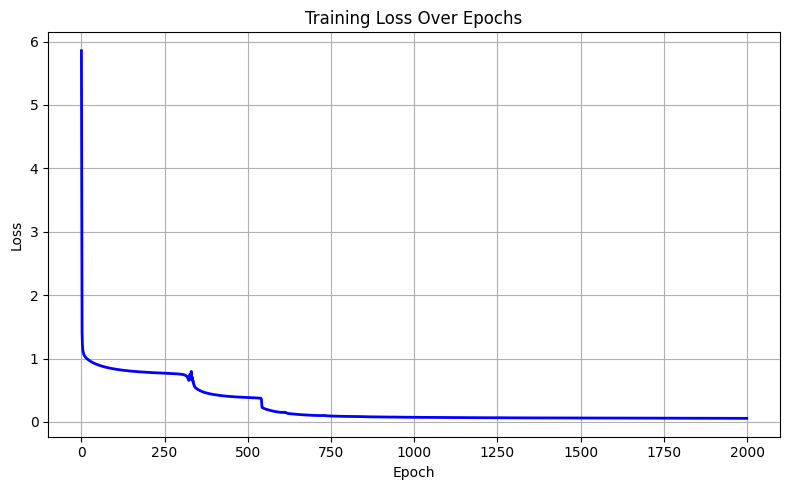

In [16]:
# Initialize the neural network
nn = NeuralNetwork(
    input_size=2,
    hidden1=32,
    hidden2=16,
    hidden3=8,
    output_size=5,
    learning_rate=0.1
)

# Training parameters
epochs = 2000

# Train the network and record loss
loss_history = nn.train(X_train, y_train, epochs)

# Plot training loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(loss_history, color='blue', linewidth=2)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
print(nn.forward([[0,0]]))
print(nn.forward([[1,1]]))

[[0.00992126 0.06000624 0.80339949 0.01039814 0.11627487]]
[[7.70940471e-05 4.25069955e-01 7.01502506e-03 5.78951336e-05
  5.67780031e-01]]


Training Accuracy: 98.12%
Test Accuracy: 97.50%
Prediction for [0 0]: Class 2
Prediction for [1 1]: Class 4


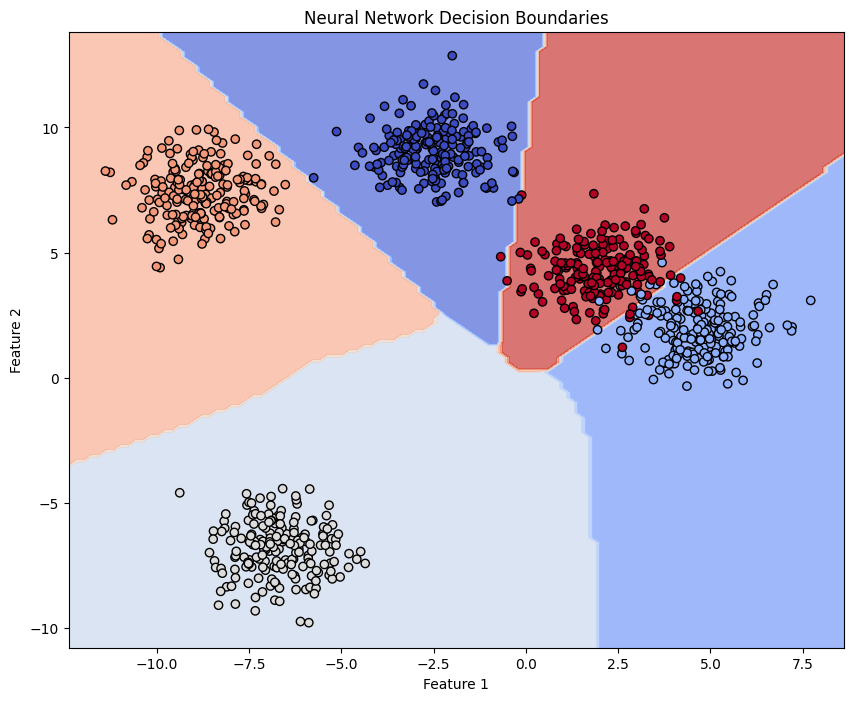

In [30]:
# Make predictions on training and test sets
train_preds = nn.predict(X_train)
test_preds = nn.predict(X_test)

# Convert one-hot labels to integer class labels
y_train_true = np.argmax(y_train, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Compute accuracies
train_accuracy = np.mean(train_preds == y_train_true)
test_accuracy = np.mean(test_preds == y_test_true)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Test the network on specific points
sample_points = np.array([[0, 0], [1, 1]])
sample_preds = nn.predict(sample_points)
for point, pred in zip(sample_points, sample_preds):
    print(f"Prediction for {point}: Class {pred}")

# Decision boundary visualization
x_min, x_max = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
y_min, y_max = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.2),
    np.arange(y_min, y_max, 0.2)
)

grid = np.c_[xx.ravel(), yy.ravel()]
Z = nn.predict(grid).reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.7, cmap="coolwarm")
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_labels, cmap="coolwarm", edgecolor="k")
plt.title("Neural Network Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
